In [1]:
#imports

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models

In [2]:
# Define the model
model = models.Sequential()

model.add(layers.Conv2D(1, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))

model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))  

model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)

model.summary()

c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 18, 18, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 1)        │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 1)        │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 1)        │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 2, 2, 1)        │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135 (540.00 B)

 Trainable params: 135 (540.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
def save_model_parameters(layer_num, layer):
    save_dir = "InitWeightsSeries"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    file_path = os.path.join(save_dir, f"layer_number_{layer_num}.npz")
    
    weights = layer.get_weights()  
    if weights:  
        np.savez(file_path, *weights)
        print(f"Saved parameters for layer {layer_num} to {file_path}")
    else:
        print(f"Layer {layer_num} has no weights to save.")

In [5]:
for i, layer in enumerate(model.layers):
    save_model_parameters(i, layer)

Saved parameters for layer 0 to InitWeightsSeries\layer_number_0.npz
Saved parameters for layer 1 to InitWeightsSeries\layer_number_1.npz
Saved parameters for layer 2 to InitWeightsSeries\layer_number_2.npz
Saved parameters for layer 3 to InitWeightsSeries\layer_number_3.npz
Saved parameters for layer 4 to InitWeightsSeries\layer_number_4.npz
Saved parameters for layer 5 to InitWeightsSeries\layer_number_5.npz
Saved parameters for layer 6 to InitWeightsSeries\layer_number_6.npz
Saved parameters for layer 7 to InitWeightsSeries\layer_number_7.npz
Saved parameters for layer 8 to InitWeightsSeries\layer_number_8.npz
Saved parameters for layer 9 to InitWeightsSeries\layer_number_9.npz
Saved parameters for layer 10 to InitWeightsSeries\layer_number_10.npz
Saved parameters for layer 11 to InitWeightsSeries\layer_number_11.npz
Saved parameters for layer 12 to InitWeightsSeries\layer_number_12.npz
Layer 13 has no weights to save.
Saved parameters for layer 14 to InitWeightsSeries\layer_number_

In [6]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        print(f"Layer {i} ")
    else:
        print(f"Layer {i} has no weights.")

Layer 0 
Layer 1 
Layer 2 
Layer 3 
Layer 4 
Layer 5 
Layer 6 
Layer 7 
Layer 8 
Layer 9 
Layer 10 
Layer 11 
Layer 12 
Layer 13 has no weights.
Layer 14 


[[[[-0.556128  ]]

  [[ 0.38714808]]

  [[ 0.23854607]]]


 [[[ 0.299376  ]]

  [[ 0.3641218 ]]

  [[-0.4793861 ]]]


 [[[ 0.09955955]]

  [[ 0.10793275]]

  [[ 0.00395763]]]]
First Conv2D Layer Kernel (Filter 0, Channel 0):


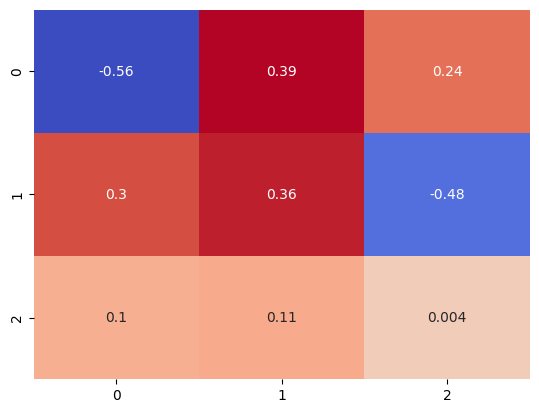

In [14]:
conv1_weights = model.layers[0].get_weights()[0]  
filter_index = 0  
channel_index = 0  
kernel_weights = conv1_weights[:, :, channel_index, filter_index]
print(conv1_weights)
print("First Conv2D Layer Kernel (Filter 0, Channel 0):")
sns.heatmap(kernel_weights, annot=True, cmap="coolwarm", cbar=False)
plt.show()

[[[[ 0.11800742]]

  [[-0.22214398]]

  [[-0.49118912]]]


 [[[ 0.4472568 ]]

  [[-0.10894224]]

  [[-0.18089548]]]


 [[[-0.38672233]]

  [[ 0.19939506]]

  [[-0.03641284]]]]
First Conv2D Layer Kernel (Filter 0, Channel 0):


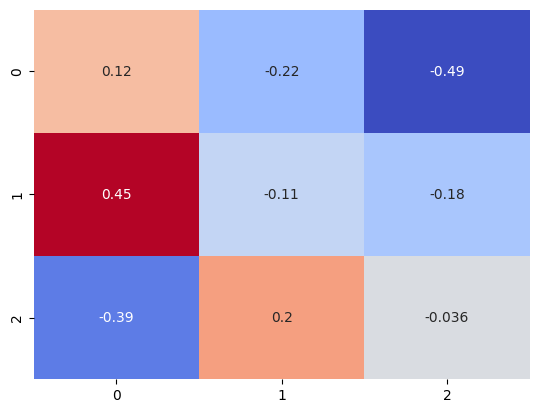

In [18]:
conv1_weights = model.layers[1].get_weights()[0]  
filter_index = 0  
channel_index = 0  
kernel_weights = conv1_weights[:, :, channel_index, filter_index]
print(conv1_weights)
print("First Conv2D Layer Kernel (Filter 0, Channel 0):")
sns.heatmap(kernel_weights, annot=True, cmap="coolwarm", cbar=False)
plt.show()

In [20]:
model.layers[14].get_weights()[0]

array([[-0.5488326 ],
       [-0.24968517],
       [ 0.74934745],
       [-0.95130086]], dtype=float32)